In [1]:
!ls

200808 SQLAlchemy Core.ipynb   SQLAlchemy-hana.ipynb
200808 SQLAlchemy ORM.ipynb    marathon_men.db
LICENSE                        marathon_women.db
README.md                      requirements.txt
SQLAlchemy Core.ipynb          sqlalchemy-hana-connection.py
SQLAlchemy ORM.ipynb           sqlalchemy-hana-select.py
SQLAlchemy-HANA ORM Type.ipynb user_post.db
SQLAlchemy-HANA Type.ipynb     user_post_core.db


In [2]:
!rm user_post.db

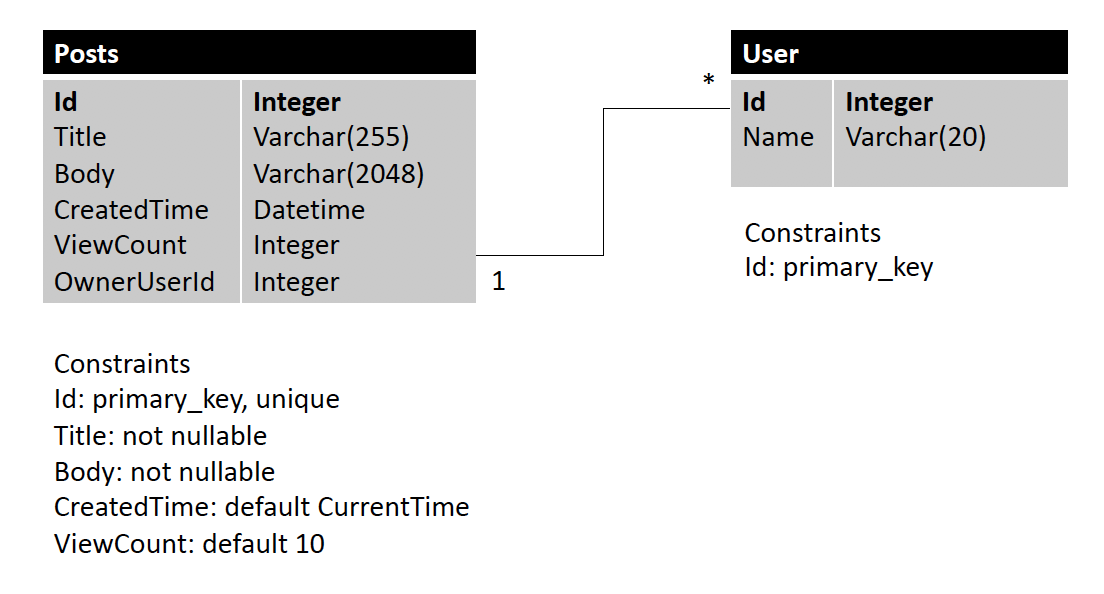

In [3]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Table, Column, Integer, String, Float, Time, Boolean, DATE, DateTime
from sqlalchemy import ForeignKey
from sqlalchemy.orm import relationship, backref
from sqlalchemy.sql import text


import datetime

In [4]:
Base = declarative_base()

In [5]:
class User(Base):
    __tablename__ = "user"
    
    user_id = Column(Integer(), primary_key=True)
    name = Column(String(20), nullable=False)
    

In [6]:
# default -> ORM 단에서 default 데이터 넣어줌
# server_default -> 직접 schema로 정의
class Posts(Base):
    __tablename__ = "posts"
    
    id = Column(Integer(), primary_key=True, unique=True)
    title = Column(String(255), nullable=False)
    body = Column(String(2048), nullable=False)
    createdTime = Column(DateTime(), default=text("current_timestamp"))
    viewCount = Column(Integer(), default=10)
    user_id = Column(Integer(), ForeignKey("user.user_id"))
    
    user = relationship("User", backref=backref("posts"))

In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///user_post.db', echo=True)

Base.metadata.create_all(engine)

2020-08-08 12:03:16,425 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-08-08 12:03:16,426 INFO sqlalchemy.engine.base.Engine ()
2020-08-08 12:03:16,427 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-08-08 12:03:16,427 INFO sqlalchemy.engine.base.Engine ()
2020-08-08 12:03:16,428 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("user")
2020-08-08 12:03:16,428 INFO sqlalchemy.engine.base.Engine ()
2020-08-08 12:03:16,429 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("user")
2020-08-08 12:03:16,430 INFO sqlalchemy.engine.base.Engine ()
2020-08-08 12:03:16,430 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("posts")
2020-08-08 12:03:16,431 INFO sqlalchemy.engine.base.Engine ()
2020-08-08 12:03:16,431 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("posts")
2020-08-08 12:03:16,432 INFO sqlalchemy.engine.base.Engine ()
2020-08-08 12:03:16,433 INFO

In [8]:
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

In [9]:
name_list = ['김보배', '서영학', '박혜민', '김현호', '권태형', 
             '박소현', '백종현', '박유정', '박진형', '백경준',
             '임현민', '전가빈', '이현우', '허신영', '최별']
for name in name_list:
    user = User(name=name)
    session.add(user)
    session.flush()
    print(user.user_id, user.name)
session.commit()

2020-08-08 12:03:16,452 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-08-08 12:03:16,453 INFO sqlalchemy.engine.base.Engine INSERT INTO user (name) VALUES (?)
2020-08-08 12:03:16,454 INFO sqlalchemy.engine.base.Engine ('김보배',)
1 김보배
2020-08-08 12:03:16,456 INFO sqlalchemy.engine.base.Engine INSERT INTO user (name) VALUES (?)
2020-08-08 12:03:16,457 INFO sqlalchemy.engine.base.Engine ('서영학',)
2 서영학
2020-08-08 12:03:16,458 INFO sqlalchemy.engine.base.Engine INSERT INTO user (name) VALUES (?)
2020-08-08 12:03:16,459 INFO sqlalchemy.engine.base.Engine ('박혜민',)
3 박혜민
2020-08-08 12:03:16,460 INFO sqlalchemy.engine.base.Engine INSERT INTO user (name) VALUES (?)
2020-08-08 12:03:16,460 INFO sqlalchemy.engine.base.Engine ('김현호',)
4 김현호
2020-08-08 12:03:16,461 INFO sqlalchemy.engine.base.Engine INSERT INTO user (name) VALUES (?)
2020-08-08 12:03:16,462 INFO sqlalchemy.engine.base.Engine ('권태형',)
5 권태형
2020-08-08 12:03:16,463 INFO sqlalchemy.engine.base.Engine INSERT INTO user (name) V

In [10]:
from random import *

post_number = list(range(1, 51))
for num in post_number:
    post = Posts(title=str(num) + "번쨰 글", body="안녕하세요. " + str(num) + "번쨰 글입니다.", user_id=1+randrange(15), viewCount=randrange(100));
    session.add(post)
    session.flush()
session.commit()

2020-08-08 12:03:16,494 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-08-08 12:03:16,495 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES (?, ?, current_timestamp, ?, ?)
2020-08-08 12:03:16,496 INFO sqlalchemy.engine.base.Engine ('1번쨰 글', '안녕하세요. 1번쨰 글입니다.', 67, 3)
2020-08-08 12:03:16,498 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES (?, ?, current_timestamp, ?, ?)
2020-08-08 12:03:16,499 INFO sqlalchemy.engine.base.Engine ('2번쨰 글', '안녕하세요. 2번쨰 글입니다.', 25, 12)
2020-08-08 12:03:16,501 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES (?, ?, current_timestamp, ?, ?)
2020-08-08 12:03:16,502 INFO sqlalchemy.engine.base.Engine ('3번쨰 글', '안녕하세요. 3번쨰 글입니다.', 8, 6)
2020-08-08 12:03:16,503 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES 

2020-08-08 12:03:16,568 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES (?, ?, current_timestamp, ?, ?)
2020-08-08 12:03:16,568 INFO sqlalchemy.engine.base.Engine ('32번쨰 글', '안녕하세요. 32번쨰 글입니다.', 27, 7)
2020-08-08 12:03:16,570 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES (?, ?, current_timestamp, ?, ?)
2020-08-08 12:03:16,571 INFO sqlalchemy.engine.base.Engine ('33번쨰 글', '안녕하세요. 33번쨰 글입니다.', 57, 7)
2020-08-08 12:03:16,572 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES (?, ?, current_timestamp, ?, ?)
2020-08-08 12:03:16,573 INFO sqlalchemy.engine.base.Engine ('34번쨰 글', '안녕하세요. 34번쨰 글입니다.', 17, 12)
2020-08-08 12:03:16,574 INFO sqlalchemy.engine.base.Engine INSERT INTO posts (title, body, "createdTime", "viewCount", user_id) VALUES (?, ?, current_timestamp, ?, ?)
2020-08-08 12:03:16,575 INFO sqlalche

In [11]:
users = session.query(User).all()
for user in users:
    print(user.user_id, user.name)

2020-08-08 12:03:16,618 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-08-08 12:03:16,619 INFO sqlalchemy.engine.base.Engine SELECT user.user_id AS user_user_id, user.name AS user_name 
FROM user
2020-08-08 12:03:16,620 INFO sqlalchemy.engine.base.Engine ()
1 김보배
2 서영학
3 박혜민
4 김현호
5 권태형
6 박소현
7 백종현
8 박유정
9 박진형
10 백경준
11 임현민
12 전가빈
13 이현우
14 허신영
15 최별


In [12]:
posts = session.query(Posts).all()
for post in posts:
    print(post.id, post.title, post.body, post.createdTime, post.viewCount, post.user_id)
    

2020-08-08 12:03:16,629 INFO sqlalchemy.engine.base.Engine SELECT posts.id AS posts_id, posts.title AS posts_title, posts.body AS posts_body, posts."createdTime" AS "posts_createdTime", posts."viewCount" AS "posts_viewCount", posts.user_id AS posts_user_id 
FROM posts
2020-08-08 12:03:16,630 INFO sqlalchemy.engine.base.Engine ()
1 1번쨰 글 안녕하세요. 1번쨰 글입니다. 2020-08-08 03:03:16 67 3
2 2번쨰 글 안녕하세요. 2번쨰 글입니다. 2020-08-08 03:03:16 25 12
3 3번쨰 글 안녕하세요. 3번쨰 글입니다. 2020-08-08 03:03:16 8 6
4 4번쨰 글 안녕하세요. 4번쨰 글입니다. 2020-08-08 03:03:16 66 5
5 5번쨰 글 안녕하세요. 5번쨰 글입니다. 2020-08-08 03:03:16 91 7
6 6번쨰 글 안녕하세요. 6번쨰 글입니다. 2020-08-08 03:03:16 63 8
7 7번쨰 글 안녕하세요. 7번쨰 글입니다. 2020-08-08 03:03:16 11 1
8 8번쨰 글 안녕하세요. 8번쨰 글입니다. 2020-08-08 03:03:16 37 15
9 9번쨰 글 안녕하세요. 9번쨰 글입니다. 2020-08-08 03:03:16 62 3
10 10번쨰 글 안녕하세요. 10번쨰 글입니다. 2020-08-08 03:03:16 68 8
11 11번쨰 글 안녕하세요. 11번쨰 글입니다. 2020-08-08 03:03:16 12 10
12 12번쨰 글 안녕하세요. 12번쨰 글입니다. 2020-08-08 03:03:16 53 8
13 13번쨰 글 안녕하세요. 13번쨰 글입니다. 2020-08-08 03:03:16 60 3
14 14